In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

%matplotlib inline

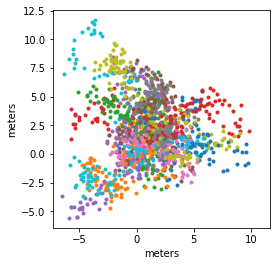

In [2]:
tmp = sio.loadmat("mousetracks.mat") # position for tracks

tracks = {}  # the assignments for each track
for trackno in range(30):
    tracks[trackno] = tmp["num%d"%(trackno)]
    
plt.close("all")
for trackno in range(30):
    plt.plot(tracks[(trackno)][:,0],tracks[(trackno)][:,1],'.')
plt.axis("square")
plt.xlabel("meters")
plt.ylabel("meters")
plt.show()

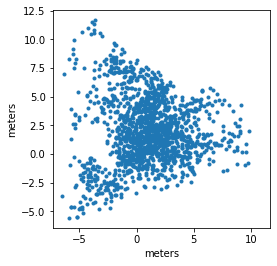

In [4]:
X = np.zeros([30*50,2])

for trackno in range(30):
    X[(trackno*50):((trackno+1)*50),:] = tracks[trackno]

plt.close("all")
plt.plot(X[:,0],X[:,1],'.')
#uncomment to plot your cluster centers
# plt.plot(C[:,0],C[:,1],'ro')
plt.axis("square")
plt.xlabel("meters")
plt.ylabel("meters")
plt.show()

In [6]:
def kmeans(X,K=5,maxiter=100):
    np.random.seed(123)
    # initialize cluster centers
    C = np.random.randint(np.min(X), high=np.max(X), size=(5,2)).astype(float)
    for iter in range(maxiter):
        tracks = {}
        for k in range(K):
            tracks[k] = []
        # cluster assignment update
        for i in range(X.shape[0]):
            dist = np.zeros(K)
            for k in range(K):
                dist[k] =  np.sqrt((X[i][0]-C[k][0])**2 + (X[i][1]-C[k][1])**2)
            c = np.argmin(dist)
            tracks[c].append(X[i])
            
        for k in range(K):
            # cluster center update
            trs = np.array(tracks[k])
            ms = np.mean(trs,axis = 0)
            C[k] = ms        
    return C
C = kmeans(X)

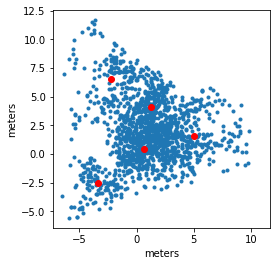

In [7]:
X = np.zeros([30*50,2])

for trackno in range(30):
    X[(trackno*50):((trackno+1)*50),:] = tracks[trackno]

plt.close("all")
plt.plot(X[:,0],X[:,1],'.')
#uncomment to plot your cluster centers
plt.plot(C[:,0],C[:,1],'ro')
plt.axis("square")
plt.xlabel("meters")
plt.ylabel("meters")
plt.show()

In [8]:
def kmedians(X,K=5,maxiter=100):
    np.random.seed(123)
    # initialize cluster centers
    C = np.random.randint(np.min(X), high=np.max(X), size=(5,2)).astype(float)
    for iter in range(maxiter):
        # cluster assignment update
        tracks = {}
        for k in range(K):
            tracks[k] = [] 
        for i in range(X.shape[0]):
            dist = np.zeros(K)
            for k in range(K):
                dist[k] =  abs(X[i][0]-C[k][0]) + abs(X[i][1]-C[k][1])
            c = np.argmin(dist)
            tracks[c].append(X[i])
        
        for k in range(K):
            # cluster center update
            trs = np.array(tracks[k])
            ms = np.median(trs,axis = 0)
            C[k] = ms 
            
    return C
C = kmedians(X)

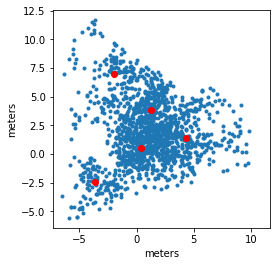

In [9]:
X = np.zeros([30*50,2])

for trackno in range(30):
    X[(trackno*50):((trackno+1)*50),:] = tracks[trackno]

plt.close("all")
plt.plot(X[:,0],X[:,1],'.')
#uncomment to plot your cluster centers
plt.plot(C[:,0],C[:,1],'ro')
plt.axis("square")
plt.xlabel("meters")
plt.ylabel("meters")
plt.show()